<a href="https://colab.research.google.com/github/liasmi/KNN_Customer_Churn_Classification/blob/main/KNN_use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
churn = pd.read_csv('churn.csv')
churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,1,41,1,83807.86,1,0,1,112542.58,0
1,502,1,42,8,159660.80,3,1,0,113931.57,1
2,850,1,43,2,125510.82,1,1,1,79084.10,0
3,645,0,44,8,113755.78,2,1,0,149756.71,1
4,376,1,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...
6378,597,1,53,4,88381.21,1,1,0,69384.71,1
6379,644,0,28,7,155060.41,1,1,0,29179.52,0
6380,516,0,35,10,57369.61,1,1,1,101699.77,0
6381,772,0,42,3,75075.31,2,1,0,92888.52,1


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6383 entries, 0 to 6382
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6383 non-null   int64  
 1   Gender           6383 non-null   int64  
 2   Age              6383 non-null   int64  
 3   Tenure           6383 non-null   int64  
 4   Balance          6383 non-null   float64
 5   NumOfProducts    6383 non-null   int64  
 6   HasCrCard        6383 non-null   int64  
 7   IsActiveMember   6383 non-null   int64  
 8   EstimatedSalary  6383 non-null   float64
 9   Exited           6383 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 498.8 KB


In [5]:
churn.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
churn.shape

(6383, 10)

In [6]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,6383.0,651.138493,96.934609,350.00,584.000,652.00,718.000,850.00
Gender,6383.0,0.452608,0.497788,0.00,0.000,0.00,1.000,1.00
Age,6383.0,39.197713,10.476208,18.00,32.000,38.00,44.000,92.00
Tenure,6383.0,4.979633,2.909514,0.00,2.000,5.00,8.000,10.00
Balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.69,139512.290,250898.09
NumOfProducts,6383.0,1.386025,0.577011,1.00,1.000,1.00,2.000,4.00
HasCrCard,6383.0,0.699201,0.458641,0.00,0.000,1.00,1.000,1.00
IsActiveMember,6383.0,0.513552,0.499855,0.00,0.000,1.00,1.000,1.00
EstimatedSalary,6383.0,100717.352956,57380.316584,11.58,51736.850,101139.30,149596.615,199970.74
Exited,6383.0,0.240796,0.427600,0.00,0.000,0.00,0.000,1.00


In [16]:
churn["Exited"].value_counts()

0    4846
1    1537
Name: Exited, dtype: int64

In [17]:
churn["Gender"].value_counts()

0    3494
1    2889
Name: Gender, dtype: int64

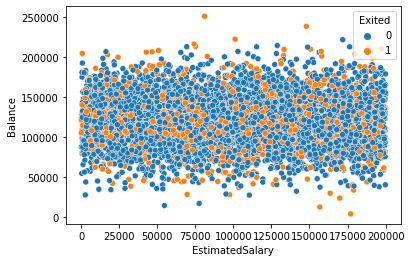

In [20]:
sns.scatterplot(data=churn, x='EstimatedSalary', y='Balance', hue='Exited')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
x = churn.drop(["Exited"], axis="columns") # dropping the output column to create the inputs (features)
y = churn["Exited"]

In [23]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,608,1,41,1,83807.86,1,0,1,112542.58
1,502,1,42,8,159660.80,3,1,0,113931.57
2,850,1,43,2,125510.82,1,1,1,79084.10
3,645,0,44,8,113755.78,2,1,0,149756.71
4,376,1,29,4,115046.74,4,1,0,119346.88
...,...,...,...,...,...,...,...,...,...
6378,597,1,53,4,88381.21,1,1,0,69384.71
6379,644,0,28,7,155060.41,1,1,0,29179.52
6380,516,0,35,10,57369.61,1,1,1,101699.77
6381,772,0,42,3,75075.31,2,1,0,92888.52


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [31]:
model=KNeighborsClassifier(n_neighbors=10)

In [32]:
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.760313315926893

In [33]:
customer = [[608.0, 1.0, 31.0, 20.0, 81207.86, 2.0, 1.0, 0.0, 111142.58]]
model.predict(customer)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [35]:
print(model.predict_proba(customer))

[[0.9 0.1]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [36]:
from sklearn.inspection import permutation_importance
#This method runs the model scoring many times, by changing (permutating) one feature at a time, to see which one causes the most change in the target.
permutation_score = permutation_importance(model, xtrain, ytrain, n_repeats=10)

np.vstack((x.columns, permutation_score.importances_mean)).T

array([['CreditScore', -0.0001566696508504828],
       ['Gender', 0.0],
       ['Age', 0.0],
       ['Tenure', 0.0],
       ['Balance', 0.014435989256938253],
       ['NumOfProducts', 0.0],
       ['HasCrCard', 0.0],
       ['IsActiveMember', 0.0],
       ['EstimatedSalary', 0.014189794091316054]], dtype=object)